# 1 Getting Ready

## 1.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta

## 1.2 Setting up Environment

In [2]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 2 Load Transformed Data

## 2.1 Load from pickle

In [3]:
df_transformed_churn = pd.read_pickle('./data/transformed/churn_transformed.pickle')

## 2.2 Have a Look into the Transformed Data

In [4]:
df_transformed_churn.head()

,CUSTOMER_ID,SENIOR_CITIZEN,GENDER,TENURE,MONTHLY_CHARGES,CHURN
0,7590-VHVEG,0,Female,1,29.85,No
1,5575-GNVDE,0,Male,34,56.95,No
2,3668-QPYBK,0,Male,2,53.85,Yes
3,7795-CFOCW,0,Male,45,42.30,No
4,9237-HQITU,0,Female,2,70.70,Yes


## 2.3 Make a copy of Transformed to work on

In [5]:
df = df_transformed_churn.copy()

# 3 Learn more about the Dataset - Meta Info

In [6]:
df.shape

(7043, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CUSTOMER_ID      7043 non-null   object 
 1   SENIOR_CITIZEN   7043 non-null   int64  
 2   GENDER           7043 non-null   object 
 3   TENURE           7043 non-null   int64  
 4   MONTHLY_CHARGES  7043 non-null   float64
 5   CHURN            7043 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 330.3+ KB


In [9]:
df.columns

Index(['CUSTOMER_ID', 'SENIOR_CITIZEN', 'GENDER', 'TENURE', 'MONTHLY_CHARGES',
       'CHURN'],
      dtype='object')

In [10]:
df.describe()

,SENIOR_CITIZEN,TENURE,MONTHLY_CHARGES
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 4 Univariate Analysis

For each and every variable

## 4.1 CUSTOMER_ID

In [11]:
df.CUSTOMER_ID.head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: CUSTOMER_ID, dtype: object

In [12]:
df.CUSTOMER_ID.isna().sum()

0

In [13]:
len(df.CUSTOMER_ID.unique())

7043

#### CUSTOMER_ID is not important for Machine Learning Input, but we are not dropping it now. Because this keeps a traceability of Data

## 4.2 TENURE

In [14]:
df.TENURE.head()

0     1
1    34
2     2
3    45
4     2
Name: TENURE, dtype: int64

In [15]:
df.TENURE.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: TENURE, dtype: float64

In [16]:
df.TENURE.isna().sum()

0

/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


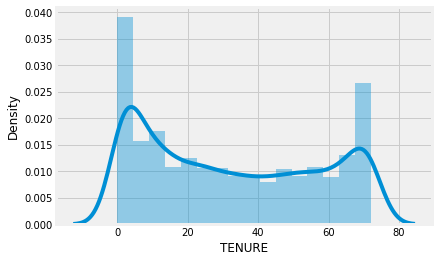

In [17]:
sns.distplot(df.TENURE, axlabel='TENURE');

<AxesSubplot:>

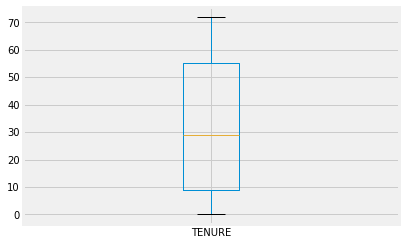

In [18]:
df.boxplot(column='TENURE', return_type='axes')

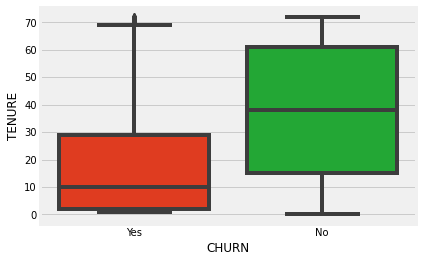

In [19]:
status_order = ['Yes','No']
status_palette = ["#ff2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#ff2600"

sns.boxplot(x='CHURN', y='TENURE', data=df, order=status_order, palette = status_palette)
plt.show()

/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


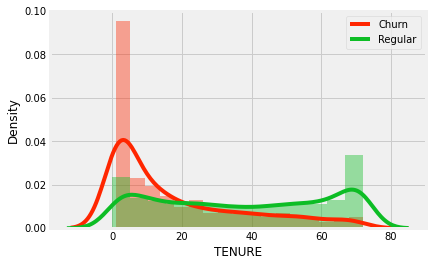

In [20]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.TENURE, label='Churn', color=color_churn)
sns.distplot(df_reg.TENURE, label='Regular', color=color_reg)
plt.legend(labels=['Churn','Regular'])
plt.show()

TENURE Seems important!

## 4.3 MONTHLY_CHARGES

In [21]:
df.MONTHLY_CHARGES.head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MONTHLY_CHARGES, dtype: float64

In [22]:
df.MONTHLY_CHARGES.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MONTHLY_CHARGES, dtype: float64

In [23]:
df.MONTHLY_CHARGES.isna().sum()

0

/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


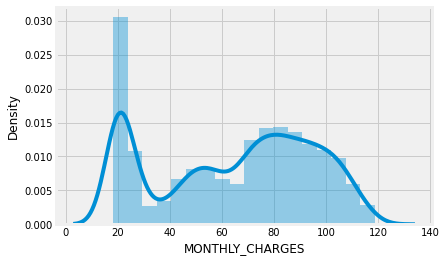

In [24]:
sns.distplot(df.MONTHLY_CHARGES, axlabel='MONTHLY_CHARGES');

<AxesSubplot:>

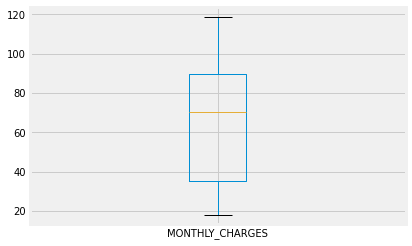

In [25]:
df.boxplot(column='MONTHLY_CHARGES', return_type='axes')

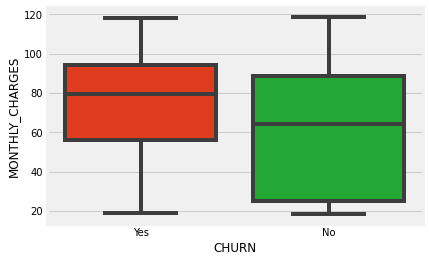

In [26]:
status_order = ['Yes','No']
status_palette = ["#ff2600","#0dbd25"]
color_reg = "#0dbd25"
color_churn = "#ff2600"

sns.boxplot(x='CHURN', y='MONTHLY_CHARGES', data=df, order=status_order, palette = status_palette)
plt.show()

/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/abdullah/DataScience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


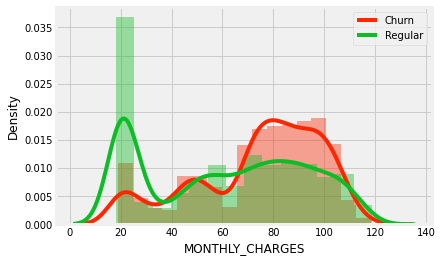

In [27]:
df_reg = df[df.CHURN == 'No']
df_churn = df[df.CHURN == 'Yes']

sns.distplot(df_churn.MONTHLY_CHARGES, label='Churn', color=color_churn)
sns.distplot(df_reg.MONTHLY_CHARGES, label='Regular', color=color_reg)
plt.legend(labels=['Churn','Regular'])
plt.show()

MONTHLY_CHARGES Seems to be important

## 4.4 CHURN

In [28]:
df.CHURN.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: CHURN, dtype: object

In [29]:
df.CHURN.describe(include=["object"])

count     7043
unique       2
top         No
freq      5174
Name: CHURN, dtype: object

In [30]:
df.CHURN.value_counts().sort_index()

No     5174
Yes    1869
Name: CHURN, dtype: int64

In [31]:
df.CHURN.isna().sum()

0

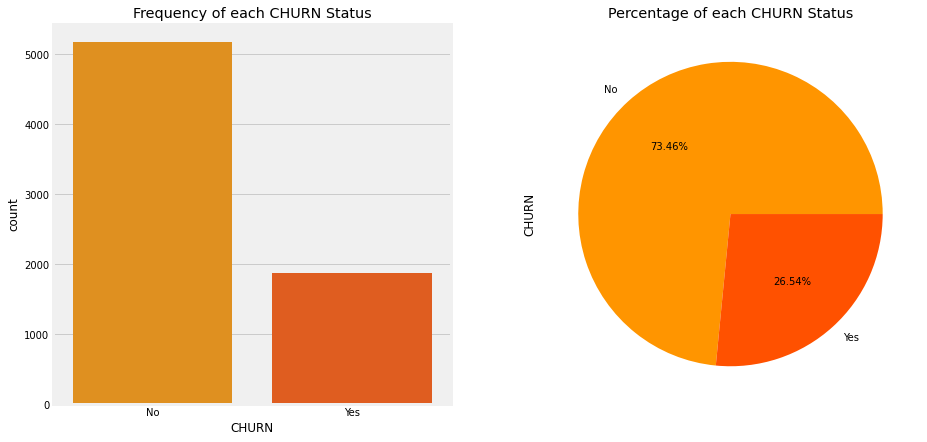

In [32]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

churn_palette = ['#ff9500','#ff5100']
sns.countplot(x='CHURN',data=df,ax=axs[0],palette=churn_palette)
axs[0].set_title("Frequency of each CHURN Status")

df.CHURN.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%', colors = churn_palette)
axs[1].set_title("Percentage of each CHURN Status")

plt.show()

In [33]:
churn_map={'Yes':1, 'No':0}
df["CHURN_STATUS"] = df["CHURN"].map(churn_map)

In [34]:
df.head()

,CUSTOMER_ID,SENIOR_CITIZEN,GENDER,TENURE,MONTHLY_CHARGES,CHURN,CHURN_STATUS
0,7590-VHVEG,0,Female,1,29.85,No,0
1,5575-GNVDE,0,Male,34,56.95,No,0
2,3668-QPYBK,0,Male,2,53.85,Yes,1
3,7795-CFOCW,0,Male,45,42.30,No,0
4,9237-HQITU,0,Female,2,70.70,Yes,1


In [35]:
df.GENDER.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: GENDER, dtype: object

In [36]:
df.GENDER.dtype

dtype('O')

In [37]:
df.GENDER.describe(include= ['object'])

count     7043
unique       2
top       Male
freq      3555
Name: GENDER, dtype: object

In [38]:
df.GENDER.value_counts().sort_index()

Female    3488
Male      3555
Name: GENDER, dtype: int64

In [39]:
df.GENDER.isna().sum()

0

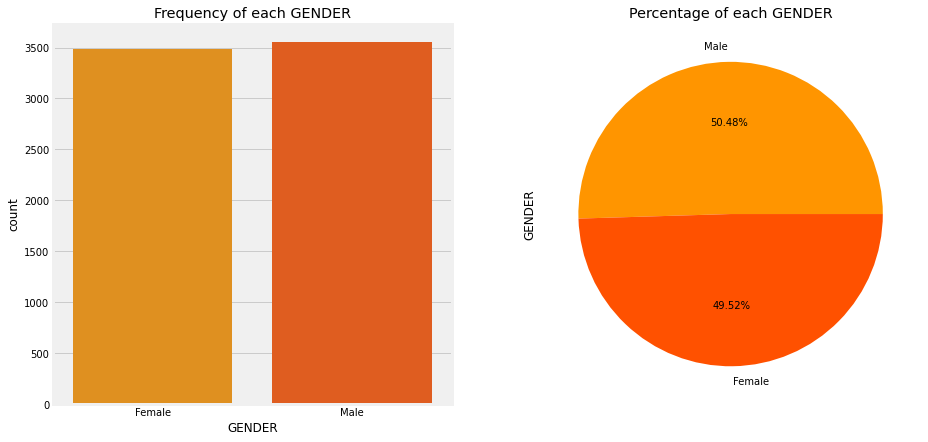

In [40]:
fig, axs = plt.subplots(1,2,figsize=(14,7))

gender_palette = ['#ff9500','#ff5100']
sns.countplot(x='GENDER',data=df,ax=axs[0],palette=gender_palette)
axs[0].set_title("Frequency of each GENDER")

df.GENDER.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%', colors = gender_palette)
axs[1].set_title("Percentage of each GENDER")

plt.show()

In [41]:
def draw_ratio_graph(dataset, first_param, second_param='CHURN'):
    second_param = dataset[second_param]
    dataset_grp = dataset.groupby([first_param, second_param])
    df_new = dataset_grp.size().unstack()
    df_new = df_new.fillna(0)
    df_new['default_ratio'] = df_new.apply(lambda x:  100 * x['Yes']/x.sum(), axis=1)
    print(df_new)
    df_final = df_new.drop(columns=["Yes", "No"])
    df_final.plot(kind="bar", stacked=True, figsize=[8,3], colormap='winter',title="default ratio")

CHURN     No  Yes  default_ratio
GENDER                          
Female  2549  939      26.920872
Male    2625  930      26.160338


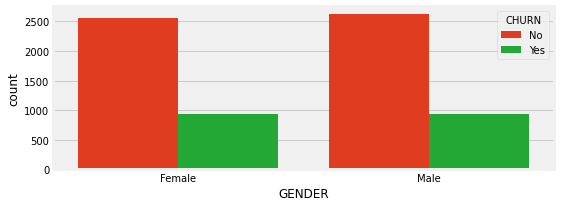

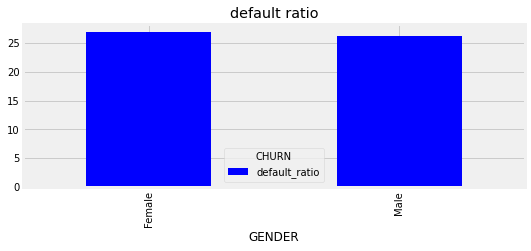

In [42]:
plt.figure(figsize=(8,3))
ax = sns.countplot(x=df['GENDER'], 
                   hue = df.CHURN,
                   palette=status_palette,
                   data=df)
draw_ratio_graph(df, df['GENDER'])

In [43]:
df=df[df.GENDER.notnull()]

In [44]:
df.shape

(7043, 7)

# 5 Output for an input for EDA Dummyfication Phase

In [45]:
df.head()

,CUSTOMER_ID,SENIOR_CITIZEN,GENDER,TENURE,MONTHLY_CHARGES,CHURN,CHURN_STATUS
0,7590-VHVEG,0,Female,1,29.85,No,0
1,5575-GNVDE,0,Male,34,56.95,No,0
2,3668-QPYBK,0,Male,2,53.85,Yes,1
3,7795-CFOCW,0,Male,45,42.30,No,0
4,9237-HQITU,0,Female,2,70.70,Yes,1


In [46]:
df.columns

Index(['CUSTOMER_ID', 'SENIOR_CITIZEN', 'GENDER', 'TENURE', 'MONTHLY_CHARGES',
       'CHURN', 'CHURN_STATUS'],
      dtype='object')

In [47]:
df_corr_subset=df[['SENIOR_CITIZEN','TENURE', 'MONTHLY_CHARGES', 'CHURN_STATUS']]

In [48]:
cor = df_corr_subset.corr()

In [49]:
cor

,SENIOR_CITIZEN,TENURE,MONTHLY_CHARGES,CHURN_STATUS
SENIOR_CITIZEN,1.000000,0.016567,0.220173,0.150889
TENURE,0.016567,1.000000,0.247900,-0.352229
MONTHLY_CHARGES,0.220173,0.247900,1.000000,0.193356
CHURN_STATUS,0.150889,-0.352229,0.193356,1.000000


In [51]:
cor.to_csv('./outputs/corr.csv')

<AxesSubplot:>

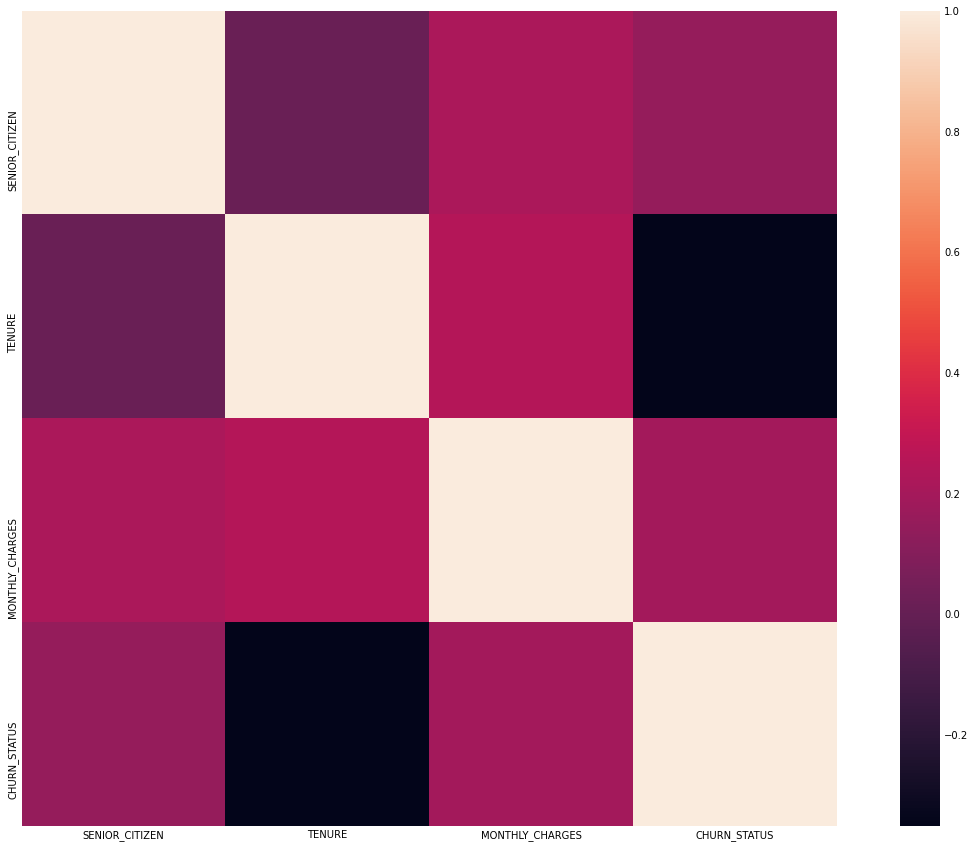

In [56]:
plt.subplots(figsize = (20,15))
sns.heatmap(cor,square= True)

## 5.1 Save as Pickle

In [57]:
df.to_pickle('./data/eda/churn_eda.pickle')